--------------

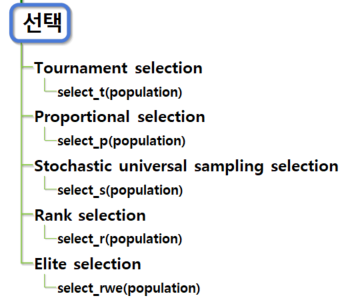

--------------

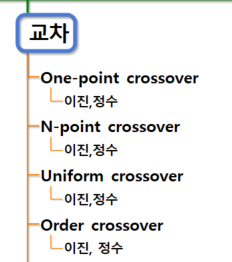

--------------

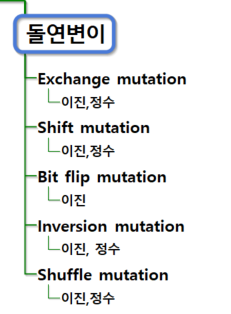

--------------

### 함수, 제약조건

In [43]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import copy

def constraints(g, min_= 0.3, max_= 5 ):
    if max_ and g > max_:
        g = max_
    if min_ and g < min_:
        g = min_
    return g

def func(x):
    return 0.5* x ** 4 - 4 * x**3 + 10 * x**2 - 7 * x + 2



### 선택

In [44]:
#토너먼트 선택
def select_tournament(population, size):
    new_offspring = []
    for _ in range(len(population)):
        candidates = [random.choice(population) for _ in range(size)]
        new_offspring.append(min(candidates, key=lambda ind: ind.fitness))
    return new_offspring


In [45]:
# 비례 선택 최대
def select_proportional(population):
    sorted_individuals = sorted(population, key = lambda ind: ind.fitness, reverse = False)
    fitness_sum = sum([ind.fitness for ind in population])
    new_offspring = []

    for _ in range(len(sorted_individuals)):
        shave = (1 - random.random()) * fitness_sum
#         print("shave",shave)
        roulette_sum = 0
        for ind in sorted_individuals:
            roulette_sum += ind.fitness
#             print("룰렛",roulette_sum)
            if roulette_sum > shave:
                new_offspring.append(ind)
                break
#     print('new',new_offspring)
    return new_offspring

In [46]:
print([ind.get_gene() for ind in select_p(population)])

[-6.8170440223218005, -6.337030386141642, -9.777937198095742, -8.612631237655384, -9.777937198095742, -9.31611574528584, -8.909546899790852, -9.777937198095742, -5.387468542891732, -9.777937198095742, -6.594120490274213, -9.31611574528584, 9.895603626777177, -9.777937198095742, -9.31611574528584, 8.384859880845333, -9.777937198095742, -9.777937198095742, -9.777937198095742, -9.777937198095742]


In [47]:
#확률적 유니버설 선택
def select_stochastic_universal_sampling(population):
    sorted_individuals = sorted(population, key = lambda ind: ind.fitness, reverse = True)
    fitness_sum = sum([ind.fitness for ind in population])

    distance = fitness_sum / len(population)
    shift = random.uniform(0, distance)
    borders = [shift + i * distance for i in range(len(population))]

    new_offspring = []
    for border in borders:
        i = 0
        roulette_sum = sorted_individuals[i].fitness
        while roulette_sum < border:
            i += 1
            roulette_sum += sorted_individuals[i].fitness
        new_offspring.append(sorted_individuals[i])

    return new_offspring

In [48]:
print([ind.get_gene() for ind in select_s(population)])

[-9.777937198095742, -9.777937198095742, -9.777937198095742, -9.777937198095742, -9.31611574528584, -9.31611574528584, -9.31611574528584, -8.909546899790852, -8.909546899790852, -8.909546899790852, -8.612631237655384, -8.612631237655384, -8.612631237655384, -6.8170440223218005, -6.594120490274213, -6.337030386141642, 9.895603626777177, 9.567097167419934, 8.834464903328147, 8.384859880845333]


In [49]:
#순위 선택
def select_rank(population):
    sorted_individuals = sorted(population, key=lambda ind: ind.fitness, reverse=False)
    rank_distance = 1 / len(population)
    ranks = [(1 - i * rank_distance) for i in range(len(population))]
    ranks_sum = sum(ranks)
    new_offspring = []

    for _ in range(len(sorted_individuals)):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                new_offspring.append(sorted_individuals[i])
                break

    return new_offspring



In [50]:
print([ind.get_gene() for ind in select_r(population)])

[4.513234423486498, -4.512739108717403, -1.8629102358141623, 4.513234423486498, -0.322765133511151, -5.387468542891732, -6.8170440223218005, 2.6159174741999784, 2.6159174741999784, -4.512739108717403, -5.387468542891732, 4.513234423486498, -1.7404091610670172, -1.8629102358141623, -1.8629102358141623, 2.6159174741999784, -4.512739108717403, 4.513234423486498, -2.256319904634381, 9.567097167419934]


In [51]:
#앨리트 순위 선택
def select_rank_with_elite(population, elite_size = 0):
    sorted_individuals = sorted(population, key = lambda ind: ind.fitness, reverse = False)
    rank_distance = 1 / len(population)
    ranks = [(1 - i * rank_distance) for i in range(len(population))]
    ranks_sum = sum(ranks)
    new_offspring = sorted_individuals[0:elite_size]

    for i in range(len(sorted_individuals) - elite_size):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                new_offspring.append(sorted_individuals[i])
                break

    return new_offspring

In [52]:
print([ind.get_gene() for ind in select_rwe(population)])

[2.6159174741999784, -0.322765133511151, 2.6159174741999784, -5.387468542891732, 8.834464903328147, -1.7404091610670172, -1.8629102358141623, -2.256319904634381, -4.512739108717403, -2.256319904634381, 2.6159174741999784, -8.612631237655384, 8.384859880845333, -2.256319904634381, -8.909546899790852, -0.322765133511151, 2.6159174741999784, 8.834464903328147, -2.256319904634381, 4.513234423486498]


### 교차

In [59]:
def crossover_one_point(p1, p2):
    point = random.randint(1, len(p1) - 1)
    c1, c2 = copy.deepcopy(p1), copy.deepcopy(p2)
    c1[point:], c2[point:] = sorted(p2[point:]), sorted(p1[point:])
    return [c1, c2]


In [60]:
crossover_one_point(p1, p2)

NameError: name 'p1' is not defined

### 돌연변이

In [53]:
# 확률
def mutation_random_deviation(ind, mu, sigma, p):
    mut = ind.get_gene()
    if random.random() < p:
        mut += random.gauss(mu, sigma)
    return Individual([mut])

In [54]:
#피트니스 드리븐
def mutation_fitness_driven_random_deviation(ind, mu, sigma, p, max_tries):
    for t in range(0, max_tries):
        mut_genes = copy.deepcopy(ind.gene_list)
        for i in range(len(mut_genes)):
            if random.random() < p:
                mut_genes[i] = mut_genes[i] - random.gauss(mu, sigma)  # 부호를 변경하여 최솟값을 찾습니다.
        mut = Individual(mut_genes)
        if ind.fitness > mut.fitness:  # 개체의 적합도가 더 낮아지는 경우에만 돌연변이가 적용됩니다.
            return mut
    return ind


### 선택 호출

In [55]:
#토너먼트 선택
def select_t(population):
    return select_tournament(population, size=3)
print([ind.get_gene() for ind in select_t(population)])

[4.513234423486498, -1.7404091610670172, -1.8629102358141623, -6.337030386141642, -0.322765133511151, -0.322765133511151, -3.0780179143596005, 4.513234423486498, 8.384859880845333, -1.7404091610670172, 4.513234423486498, -2.256319904634381, -3.0780179143596005, 8.384859880845333, 8.384859880845333, -0.322765133511151, 8.834464903328147, -1.8629102358141623, 4.513234423486498, 2.6159174741999784]


In [30]:
#비례 선택
def select_p(population):
    return select_proportional(population)
print([ind.get_gene() for ind in select_p(population)])

[-5.387468542891732, -9.777937198095742, -6.8170440223218005, -6.337030386141642, -9.777937198095742, -8.612631237655384, -9.777937198095742, -9.31611574528584, -8.909546899790852, -9.777937198095742, -5.387468542891732, -9.777937198095742, -6.594120490274213, -9.31611574528584, 9.895603626777177, -9.777937198095742, -9.31611574528584, 8.384859880845333, -9.777937198095742, -9.777937198095742]


In [31]:
#확률적 유니버셜 선택
def select_s(population):
    return select_stochastic_universal_sampling(population)
print([ind.get_gene() for ind in select_s(population)])

[-9.777937198095742, -9.777937198095742, -9.777937198095742, -9.777937198095742, -9.31611574528584, -9.31611574528584, -9.31611574528584, -9.31611574528584, -8.909546899790852, -8.909546899790852, -8.909546899790852, -8.612631237655384, -8.612631237655384, -8.612631237655384, -6.8170440223218005, -6.594120490274213, -6.337030386141642, 9.895603626777177, -5.387468542891732, -4.512739108717403]


In [32]:
#순위 선택
def select_r(population):
    return select_rank(population)
print([ind.get_gene() for ind in select_r(population)])

[2.6159174741999784, -5.387468542891732, 4.513234423486498, -4.512739108717403, -1.8629102358141623, 4.513234423486498, -0.322765133511151, -5.387468542891732, -6.8170440223218005, 2.6159174741999784, 2.6159174741999784, -4.512739108717403, -5.387468542891732, 4.513234423486498, -1.7404091610670172, -1.8629102358141623, -1.8629102358141623, 2.6159174741999784, -4.512739108717403, 4.513234423486498]


In [33]:
#앨리트 순위 선택
def select_rwe(population):
    
    return select_rank_with_elite(population, 2)
print([ind.get_gene() for ind in select_rwe(population)])

[2.6159174741999784, -0.322765133511151, -2.256319904634381, 9.567097167419934, 2.6159174741999784, -5.387468542891732, 8.834464903328147, -1.7404091610670172, -1.8629102358141623, -2.256319904634381, -4.512739108717403, -2.256319904634381, 2.6159174741999784, -8.612631237655384, 8.384859880845333, -2.256319904634381, -8.909546899790852, -0.322765133511151, 2.6159174741999784, 8.834464903328147]


### 교차 호출

### 돌연변이 호출

In [34]:
def mutate_r(ind):
    mutated_gene = mutation_random_deviation(ind, 0, 1, 0.1)
    return mutated_gene

In [35]:
def mutate_f(ind):
    mutated_gene = mutation_fitness_driven_random_deviation(ind, 0, 1, 0.1, 3)
    return mutated_gene

### 초기해 생성

In [36]:
class Individual:
    def __init__(self, gene_list: List[float]) -> None:
        self.gene_list = gene_list
        self.fitness = func(self.gene_list[0])

    def get_gene(self):
        return self.gene_list[0]

In [61]:
def create_random():
    return Individual([random.uniform(-10, 10)])

### 좋은 개체 찾기

In [38]:
def get_best(population):
    best = population[0]
    for ind in population:
        if ind.fitness < best.fitness:
            best = ind
    return best

### 그래프

In [39]:
### 제약조건

random.seed(52)
POPULATION_SIZE = 20
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.1
MAX_GENERATIONS = 10def plot_population(population, number_of_population):
    best = get_best(population)
    x = np.linspace(-10, 10, 100)
    plt.plot(x, func(x), '--', color='blue')
    plt.plot(
        [ind.get_gene() for ind in population],
        [ind.fitness for ind in population],
        'o', color='orange'
    )
    plt.plot([best.get_gene()], [best.fitness], 's', color='green')
    plt.title(f"Generation number {number_of_population}")
    plt.ylim(-3, 6)
    plt.show()
    plt.close()

SyntaxError: invalid syntax (2605476151.py, line 7)

### 제약조건

In [40]:
random.seed(52)
POPULATION_SIZE = 20
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.1
MAX_GENERATIONS = 10

In [84]:
first_population = [create_random() for _ in range(POPULATION_SIZE)]

generation_number = 0

population = first_population.copy()

print([ind.get_gene() for ind in population])

[-3.498185698864922, -3.4410362561840335, 0.3410068074094532, 4.270490743700947, -8.783880833557893, -8.366185034739022, -6.77345440384566, -0.46531828851020585, -2.766258348798196, -4.94766971586804, -3.4820964628112367, 1.6283677252089497, -6.670343243599928, -1.4752018952439059, -5.726360508489369, -9.578244279971742, -4.229853927078127, -5.554412736064192, -0.6346988072489665, -2.996803498314211]


### 초기해

In [41]:
def plot_population(population, number_of_population):
    best = get_best(population)
    x = np.linspace(-10, 10, 100)
    plt.plot(x, func(x), '--', color='blue')
    plt.plot(
        [ind.get_gene() for ind in population],
        [ind.fitness for ind in population],
        'o', color='orange'
    )
    plt.plot([best.get_gene()], [best.fitness], 's', color='green')
    plt.title(f"Generation number {number_of_population}")
    plt.ylim(-1, 6)
    plt.show()
    plt.close()

# 선택

### 토너먼트

In [95]:
first_population = [create_random() for _ in range(POPULATION_SIZE)]

generation_number = 0

population = first_population.copy()

plot_population(first_population, 0) #0세대

while generation_number < MAX_GENERATIONS:
    generation_number += 1
    
    # SELECTION
    offspring = select_t(population)
    print([ind.get_gene() for ind in population])
    
    # CROSSOVER
    crossed_offspring = []
    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CROSSOVER_PROBABILITY:  
            kid1, kid2 = crossover_b(ind1, ind2)
            crossed_offspring.append(kid1)
            crossed_offspring.append(kid2)
        else:
            crossed_offspring.append(ind1)
            crossed_offspring.append(ind2)
            
    # MUTATION
    mutated_offspring = []
    for mutant in crossed_offspring:
        if random.random() < MUTATION_PROBABILITY:
            new_mutant = mutate_r(mutant)
            mutated_offspring.append(new_mutant)
        else:
            mutated_offspring.append(mutant)
    
    population = mutated_offspring.copy()
    plot_population(population, generation_number)
    print([ind.get_gene() for ind in population])

AttributeError: 'Individual' object has no attribute 'fitness'

AttributeError: 'Individual' object has no attribute 'fitness'